# SARIMA Model 

### Add Project directory to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Load Module

In [2]:
from script.SARIMA_model import Modelling
modelling=Modelling()

### Load Stoke Price Data

In [3]:
stoke_data=modelling.load_data("data/stoke_data.csv")

## **Modelling For Tesla(TSLA) Stock Price**

### **Train-Test Split**

In [4]:
train,test=modelling.train_test_split(stoke_data,'TSLA')

2024-11-12 08:10:05,040 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search P,Q and D parameters**
The non-seasonal parameters (p,d and q) are used from the grid search used in the ARIMA model earlier.

In [5]:
best_params={'d': 1, 'p': 2, 'q': 3}
best_seasonal_params=modelling.grid_search(train,test,best_params)

2024-11-12 08:19:28,340 - INFO - Grid search is use to find the best seasonal orders of the SARIMA model.


Best seasonal parameters: {'D': 1, 'P': 0, 'Q': 1} with MAE: 31.96195266480856
Best overall SARIMA model parameters: (p, d, q): {'d': 1, 'p': 2, 'q': 3}, (P, D, Q, s): {'D': 1, 'P': 0, 'Q': 1}


### **Train with SARIMA model**

In [ ]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

2024-11-12 08:23:20,189 - INFO - The best orders are used to fit the SARIMA model.


### **Evaluate**

In [8]:
modelling.evaluate_sarima_model(test,forecast)

2024-11-12 08:24:27,256 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 31.96195266480856
Mean Squared Error (MSE): 1729.3387420838224
Root Mean Squared Error (RMSE): 41.58531882869028
R Square Score (r2_score): -0.16815214947628343
Mean Absolute Percentage Error (MAPE): 16.305795934434382 %


### **Plot Result**

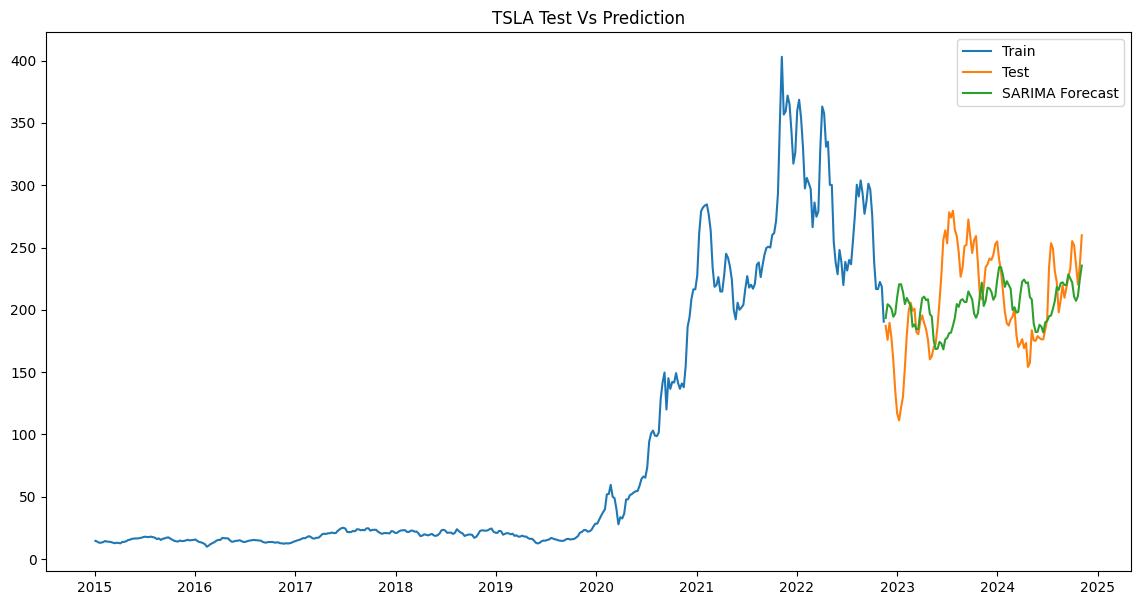

2024-11-12 08:24:40,320 - INFO - Plot of the resulting prediction.


In [9]:
modelling.plot_result('TSLA',train,test,forecast)

## **Modelling For Vanguard Total Bond Market ETF (BND) Stock Price**

### **Train-Test Split**

In [ ]:
train,test=modelling.train_test_split(stoke_data,'BND')

### **Grid Search P,Q and D parameters**
The non-seasonal parameters (p,d and q) are used from the grid search used in the ARIMA model earlier.

In [ ]:
best_params={'d': 1, 'p': 4, 'q': 4}
best_seasonal_params=modelling.grid_search(train,test,best_params)

### **Train with SARIMA model**

In [ ]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

### **Evaluate**

In [ ]:
modelling.evaluate_sarima_model(test,forecast)

### **Plot Result**

In [ ]:
modelling.plot_result('BND',train,test,forecast)

## **Modelling For S&P 500 ETF (SPY) Stock Price**

### **Train-Test Split**

In [ ]:
train,test=modelling.train_test_split(stoke_data,'SPY')

### **Grid Search P,Q and D parameters**
The non-seasonal parameters (p,d and q) are used from the grid search used in the ARIMA model earlier.

In [ ]:
best_params={'d': 1, 'p': 4, 'q': 4}
best_seasonal_params=modelling.grid_search(train,test,best_params)

### **Train with SARIMA model**

In [ ]:
forecast=modelling.sarima_train(train,test,best_params,best_seasonal_params)

### **Evaluate**

In [ ]:
modelling.evaluate_sarima_model(test,forecast)

### **Plot Result**

In [ ]:
modelling.plot_result('SPY',train,test,forecast)